# <img style="float: left; padding-right: 20px; height: 70px" src="https://i.imgur.com/cMzxwTN.jpg"> Fundamentos de Machine Learning
## Sesion 2, Actividad II

**Universidad Privada Boliviana**<br/>
**Diplomado en Machine Learning y Ciencia de Datos**<br/>


In [1]:
# Import necessary libraries
%matplotlib inline
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


### 1. Leer el dataset

In [2]:
# Read the file "dataset.csv" as a Pandas dataframe
df = pd.read_csv("dataset1.csv")

# Eche un vistazo rápido al conjunto de datos
df.head()


,x1,y1
0,0.265960,1.624972
1,0.516805,2.734012
2,0.658542,4.628908
3,1.678052,5.186455
4,2.112463,8.395088


In [3]:
# Asigne los valores de las columnas x e y a la
# variables predictoras y de respuesta
x = df[["x1"]].values
y = df["y1"].values


### 2. Dividir en Train-validation sets

In [4]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y validación con un conjunto de entrenamiento del 75 %
# Establecer estado_aleatorio=1
# Dividir estos datos para comparar con validacion cruzada
x_train, x_val, y_train, y_val = train_test_split(x,y,train_size=0.75,random_state=1)


### 3. Realizar la validacion cruzada con 4 pliegues con un polinomio de primer grado

In [5]:
### codigo aca
# Para un polinomio de grado 1, y validacion cruzada de 4 pliegues
x_poly = PolynomialFeatures(degree=1).fit_transform(x)
lreg   = LinearRegression(fit_intercept=False)
cross_val = cross_validate(lreg, x_poly, y, cv =4, scoring="neg_mean_squared_error")
# obtener el error de validacion cruzada
print(cross_val) 
# obtener el promedio del error de validacion cruzada
print(-1*np.mean(cross_val["test_score"]))

{'fit_time': array([0.0019958 , 0.00104046, 0.        , 0.00156808]), 'score_time': array([0.00099564, 0.0009551 , 0.00099659, 0.00099349]), 'test_score': array([-229.16475243,  -49.4446576 ,  -31.27591997, -152.14280128])}
115.5070328193026


#### 3.1 Analizar la variable de validacion cruzada


In [6]:
### Encontrar el error promedio de validacion cruzada
print(-1*np.mean(cross_val["test_score"]))

115.5070328193026


### 4. Encontrar el  MSE para polinomios de grado variable

In [12]:
# Seleccionar el grado maximo a iterar
maxdeg = 15
training_error = []
validation_error = []
cross_validation_error = []
for d in [2,6,10]:
    # calculo de los polynomial features
    x_poly = PolynomialFeatures(degree=d).fit_transform(x)
    
    x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_train)
    x_poly_val   = PolynomialFeatures(degree=d).fit_transform(x_val)
    # Inicializar el modelo de regresion sin utilizar el intercept
    lreg = LinearRegression(fit_intercept=False)
    # Ajustar el modelo en los datos de entrenamiento
    # Un solo conjunto de validacion
    lreg.fit(x_poly_train,y_train)

    # Utilizar el modelo entrenado para predecir en los datos transformados del train set
    # Un solo conjunto de validacion
    y_train_pred = lreg.predict(x_poly_train)
    # Utilizar el modelo entrenado para predecir en los datos transformados del validation set
    y_val_pred   = lreg.predict(x_poly_val)

    # Calcular el error en base a los datos en y_train_pred y y_val_pred
    training_error.append(mean_squared_error(y_train,y_train_pred))
    validation_error.append(mean_squared_error(y_val,y_val_pred))

    # realizar cross validation 
    cross_val = cross_validate(lreg, x_poly, y, cv = 4 , scoring = "neg_mean_squared_error" )
    mse_score = np.mean(-1*cross_val["test_score"])
    cross_validation_error.append(mse_score)
print(validation_error)
print(cross_validation_error)

    

[2.250715205970138, 1.3532575981865105, 3.0062773294081055]
[np.float64(6.543435472232517), np.float64(1117.2526378104385), np.float64(1497286.1656705092)]


#### 4.1 Encontrar el grado optimo del polinomio

In [13]:
grado_optimo_valid_unica = validation_error.index(min(validation_error))
grado_optimo_valid_cruzada = cross_validation_error.index(min(cross_validation_error))
print("grado optimo validacion unica:", grado_optimo_valid_unica)
print("grado optimo validacion cruzada:", grado_optimo_valid_cruzada) 

grado optimo validacion unica: 1
grado optimo validacion cruzada: 0


#### 4.2 Graficar los errores obtenidos

ValueError: x and y must have same first dimension, but have shapes (15,) and (3,)

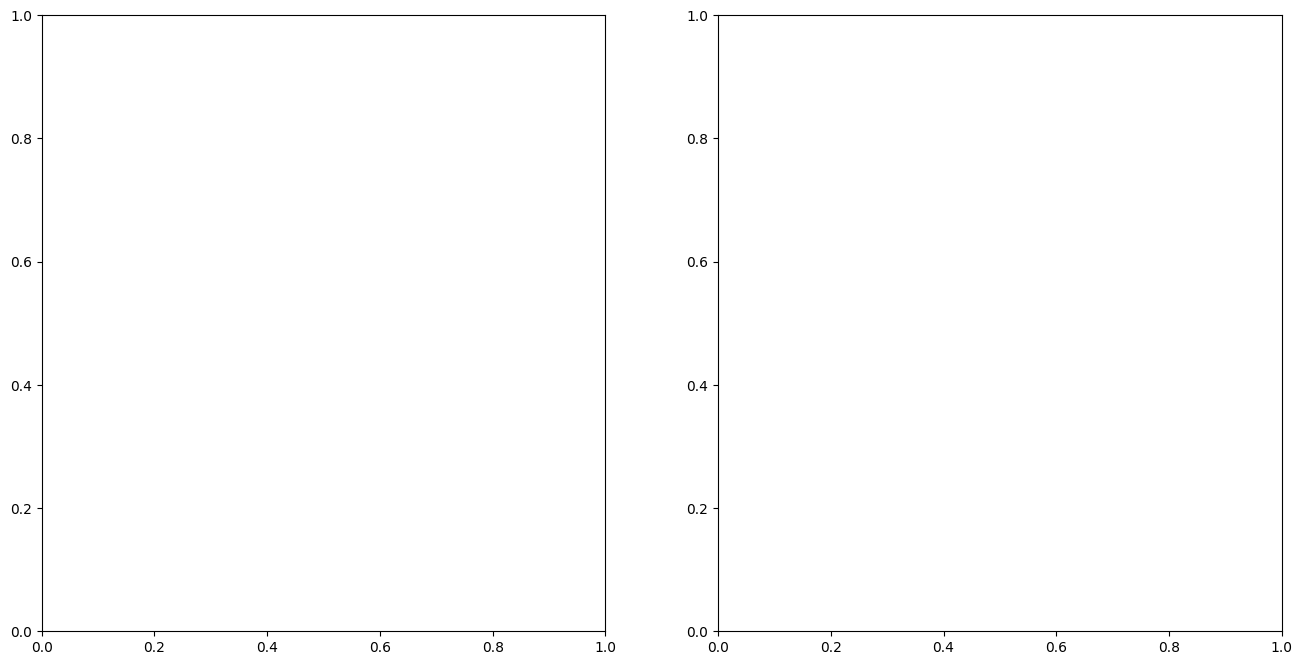

In [14]:

fig,ax = plt.subplots(1,2,figsize=(16,8))

# Graficar el error del training set con etiquetas
ax[0].plot(range(maxdeg),np.log(training_error),label="Training error")
# Graficar el error del validation set con etiquetas
ax[0].plot(range(maxdeg),np.log(validation_error), "o-",label="Validation error")

# Graficar el error del training set con etiquetas
ax[1].plot(range(maxdeg),np.log(training_error),label="Training error")
# Graficar el error del validation set con etiquetas
ax[1].plot(range(maxdeg),np.log(cross_validation_error),"o-",label="Cross-Validation error")


# agregar etiquetas a los ejes:
ax[0].set_xlabel("Grado del polinomio")
ax[0].set_ylabel("Log MSE")
ax[0].set_title("Log de error de validacion vs grado")
ax[0].legend(loc='best')

# agregar etiquetas a los ejes:
ax[1].set_xlabel("Grado del polinomio")
ax[1].set_ylabel("Log MSE")
ax[1].set_title("Log de Cross Val. error vs grado")
ax[1].legend(loc='best')

plt.show()

In [ ]:
# Seleccionar el grado maximo a iterar
maxdeg = 15
training_error = []
validation_error = []
cross_validation_error = []
for d in [2,6,10]:
    # calculo de los polynomial features
    x_poly = PolynomialFeatures(degree=d).fit_transform(x)
    
    x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_train)
    x_poly_val   = PolynomialFeatures(degree=d).fit_transform(x_val)

#[3.6696196613016077, 2.1962657499572513, 4.547240132535112]
#[np.float64(6.543435472232517), np.float64(1117.2526378104385), np.float64(1497286.1656705092)]1

⏸ Si ejecutas el ejercicio con un estado aleatorio de 0, ¿notas algún cambio? ¿Qué conclusión puedes sacar de este experimento?


In [18]:

answer1 = '---'


### 5. Analisis para otro dataset

Repetir los pasos anteriores $1,2,4$ para el `dataset2.csv`


Anotar sus observaciones